In [1]:
# Imports
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
from squigglepy import bayes
import matplotlib.pyplot as plt
from pprint import pprint


def hist(samples, title=None, bins=200):
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.hist(samples, bins=bins)
    if title is not None:
        plt.title(title)
    return plt.show()


print('Loaded')

Loaded


In [2]:
def chance_of_death_from_covid(age, gender='male', copd=False, immune_compromised=False, diabetic=False, treatments=True):
    """
    Calculation based on equation from https://twitter.com/DFisman/status/1273266048570138625 adjusted
    for CFR->IFR using age-based weights derived from https://www.medrxiv.org/content/10.1101/2020.07.23.20160895v2
    Omicron reduction from https://www.metaculus.com/questions/8766/omicron-variant-less-deadly-than-delta/
    """
    
    gender = 2 if gender.lower() == 'male' else 0
    copd = 3 if copd else 0
    immune_compromised = 4 if immune_compromised else 0
    diabetic = 4 if diabetic else 0
    treatments = 0.2 if treatments else 1
    
    if age < 50:
        adj_age = 10
    elif age < 60:
        adj_age = 8
    elif age < 70:
        adj_age = 4.5
    elif age < 80:
        adj_age = 3.5
    else:
        adj_age = 1
        
    omicron_reduction = 0.94
    
    p = 1 / ((np.exp(9.99 - 0.34 * ((age*3)/10 + gender + copd + immune_compromised + diabetic)) + 1) * adj_age)
    return p * omicron_reduction * treatments
    

print('29yo male, no COPD/immune/diabetic: {}'.format(sq.one_in(chance_of_death_from_covid(29,
                                                                                           gender='male',
                                                                                           copd=False,
                                                                                           immune_compromised=False,
                                                                                           diabetic=False,
                                                                                           treatments=True))))

print('28yo female w/ immune: {}'.format(sq.one_in(chance_of_death_from_covid(28,
                                                                              gender='female',
                                                                              copd=False,
                                                                              immune_compromised=True,
                                                                              diabetic=False,
                                                                              treatments=True))))

print('66yo female, no COPD/immune/diabetic: {}'.format(sq.one_in(chance_of_death_from_covid(66,
                                                                                             gender='female',
                                                                                             copd=False,
                                                                                             immune_compromised=False,
                                                                                             diabetic=False,
                                                                                             treatments=True))))

print('66yo male, diabetic: {}'.format(sq.one_in(chance_of_death_from_covid(66,
                                                                            gender='male',
                                                                            copd=False,
                                                                            immune_compromised=False,
                                                                            diabetic=True,
                                                                            treatments=True))))

print('80yo female, COPD: {}'.format(sq.one_in(chance_of_death_from_covid(80,
                                                                          gender='female',
                                                                          copd=True,
                                                                          immune_compromised=False,
                                                                          diabetic=False,
                                                                          treatments=True))))



29yo male, no COPD/immune/diabetic: 1 in 30,566
28yo female w/ immune: 1 in 17,171
66yo female, no COPD/immune/diabetic: 1 in 646
66yo male, diabetic: 1 in 105
80yo female, COPD: 1 in 17


In [3]:
def value_lost_from_covid(p_covid_infection):    
    p_sickness_g_covid = 0.2
    days_sick = sq.to(4, 15)
    dollars_per_hour = 100
    hours_per_day = 10
    value_lost_from_sickness = dollars_per_hour * hours_per_day * days_sick
    
    p_long_covid_g_covid = 0.01
    months_sick = sq.to(4, 15)
    value_lost_from_long_covid = dollars_per_hour * 2 * 30.5 * months_sick
    
    value_of_life = 100*M
    p_death_g_covid = chance_of_death_from_covid(29) * sq.to(1/3, 3)
    value_lost_from_death = value_of_life * p_death_g_covid *  p_covid_infection
    
    return (value_lost_from_sickness + value_lost_from_death + value_lost_from_long_covid) * p_covid_infection


print('Loaded')

Loaded


## CONCERT ##


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 19020.41it/s]


-
Mean: 42.42, SD: 38.01
-


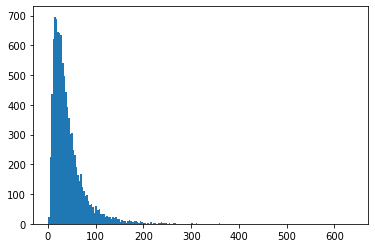

{1: 5.37,
 5: 9.21,
 10: 12.16,
 20: 16.74,
 30: 21.44,
 40: 26.44,
 50: 31.76,
 60: 38.33,
 70: 47.04,
 80: 59.43,
 90: 82.98,
 95: 111.22,
 99: 190.83}
-
96.64% chance masking is a good idea


In [4]:
n_samples = 10*K

print('## CONCERT ##')
p_covid_infection = sq.to(190/M, 1700/M) # https://www.microcovid.org/?distance=close&duration=120&interaction=oneTime&personCount=15&riskProfile=average&scenarioName=custom&setting=indoor&subLocation=US_39061&theirMask=none&topLocation=US_39&voice=silent&yourMask=n95&yourVaccineDoses=3&yourVaccineType=moderna
samples = sq.sample(value_lost_from_covid(p_covid_infection), n=n_samples, verbose=True)

print('-')
print('Mean: {}, SD: {}'.format(round(np.mean(samples), 2),
                                round(np.std(samples), 2)))
print('-')
hist(samples)
pprint(sq.get_percentiles(samples, digits=2))

print('-')
willingness_to_pay_to_avoid_masking = 8
print('{}% chance masking is a good idea'.format(sum([s > willingness_to_pay_to_avoid_masking for s in samples]) / n_samples * 100))



## AIRPLANE ##


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 18696.27it/s]


-
Mean: 1.41, SD: 1.3
-


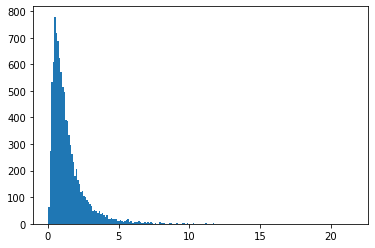

{1: 0.17,
 5: 0.29,
 10: 0.39,
 20: 0.54,
 30: 0.69,
 40: 0.85,
 50: 1.04,
 60: 1.26,
 70: 1.55,
 80: 2.0,
 90: 2.82,
 95: 3.77,
 99: 6.58}
-
1.35% chance masking is a good idea


In [6]:
print('## AIRPLANE ##')
p_covid_infection = sq.to(6/M, 58/M) # https://www.microcovid.org/?distance=normal&duration=180&interaction=oneTime&personCount=6&riskProfile=average&scenarioName=custom&setting=plane&subLocation=US_39061&theirMask=none&theirVaccine=vaccinated&topLocation=US_39&voice=silent&yourMask=n95&yourVaccineDoses=3&yourVaccineType=moderna
samples = sq.sample(value_lost_from_covid(p_covid_infection), n=n_samples, verbose=True)

print('-')
print('Mean: {}, SD: {}'.format(round(np.mean(samples), 2),
                                round(np.std(samples), 2)))
print('-')
hist(samples)
pprint(sq.get_percentiles(samples, digits=2))

print('-')
willingness_to_pay_to_avoid_masking = 6
print('{}% chance masking is a good idea'.format(sum([s > willingness_to_pay_to_avoid_masking for s in samples]) / n_samples * 100))

